# PART II: What is the Type distribution in difference subsets?

## CONTENT

1. [**WHICH TYPE OF PROPERTIES HAS HIGHER FREQUENCY?**](#1)
2. [**WHAT IS THE DISTRIBUTION IN DIFFERENT AREA?**](#2)
3. [**DIFFERENCE BETWEEN 2 SUBSETS?**](#3)
4. [**STATISTICAL ANALYSIS WITH NUMERICAL DATA**](#4)
5. [**CONCLUDE**](#5)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

__author__="Ya Yu Chen"
__email__="a725761@gmail.com"

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
raw_df = pd.read_csv('melb_data_with_correct_council.csv')
df = raw_df.copy()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Melbourne,902/16 Liverpool St,1,u,427000,S,Harcourts,3/12/2016,2.8,3000,1,1,0.0,0,NaN,NaN,Melbourne,-37.8111,144.9715,Northern Metropolitan,17496
1,Melbourne,14/2 Exhibition St,2,u,1160500,S,Kay,4/03/2017,2.8,3000,2,2,1.0,4230,NaN,2006.0,Melbourne,-37.8157,144.9727,Northern Metropolitan,17496
2,Melbourne,2306/265 Exhibition St,2,u,780000,SP,Galldon,4/06/2016,2.8,3000,2,2,1.0,0,85.0,1997.0,Melbourne,-37.8095,144.9691,Northern Metropolitan,17496
3,Melbourne,1501/87 Franklin St,2,u,535000,S,HAR,7/05/2016,2.8,3000,2,1,1.0,0,84.0,2001.0,Melbourne,-37.8080,144.9617,Northern Metropolitan,17496
4,Melbourne,3811/80 Abeckett St,2,u,450000,VB,MICM,7/11/2016,2.8,3000,2,1,1.0,0,55.0,2014.0,Melbourne,-37.8091,144.9609,Northern Metropolitan,17496


In [4]:
# Remove properties whih located at Victoria 
df_metro = df.query("Regionname not in ('Northern Victoria', 'Eastern Victoria', 'Western Victoria')")
df_metro.shape

(13454, 21)

<a class="anchor" id="1"></a>
## Distribution of Types

<AxesSubplot:title={'center':'Type distribution'}>

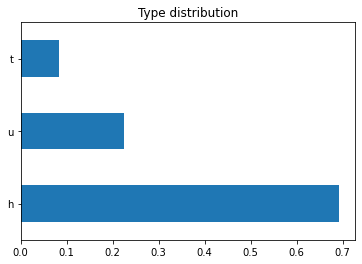

In [5]:
(df_metro.Type.value_counts()/df_metro.shape[0]).plot(kind='barh', title='Type distribution')

**H TYPE** has higher percentage of all properties which is nearly **70%**.

In [6]:
t = df_metro.query("Type == 't'")
u = df_metro.query("Type == 'u'")
h = df_metro.query("Type == 'h'")
print(t.shape)
print(u.shape)
print(h.shape)

(1114, 21)
(3014, 21)
(9326, 21)


## Council distribution - divide into 2 different subsets

<AxesSubplot:title={'center':'Council area distribution'}>

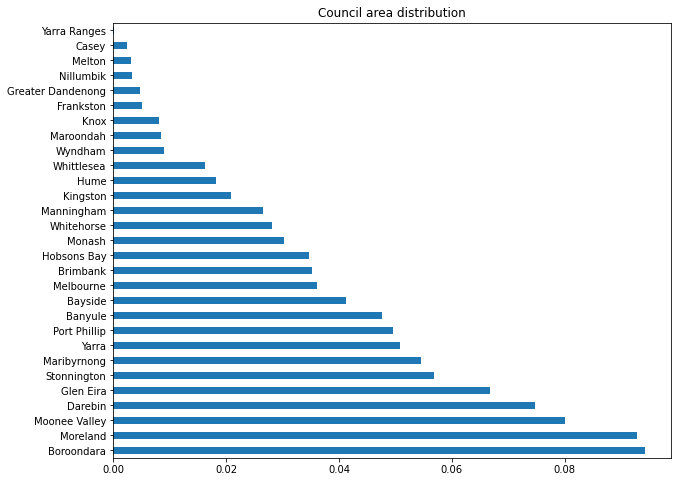

In [7]:
coun_count = df_metro.CouncilArea.value_counts()
(coun_count / df_metro.shape[0]).plot(kind='barh', figsize=(10,8), title='Council area distribution')

In [8]:
# inspect which council area's frequency are over 5%
coun_count.index[(coun_count.values / df_metro.shape[0]) > 0.05]

Index(['Boroondara', 'Moreland', 'Moonee Valley', 'Darebin', 'Glen Eira',
       'Stonnington', 'Maribyrnong', 'Yarra'],
      dtype='object')

In [9]:
def council_level(value):
    if value in ('Boroondara', 'Moreland', 'Moonee Valley', 'Darebin', 'Glen Eira', 'Stonnington', 'Maribyrnong', 'Yarra'):
        return 1
    else: 
        return 0
    
df_metro['Council_level'] = df.CouncilArea.apply(council_level)
df_metro.head()

<ipython-input-9-129797a302a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metro['Council_level'] = df.CouncilArea.apply(council_level)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Council_level
0,Melbourne,902/16 Liverpool St,1,u,427000,S,Harcourts,3/12/2016,2.8,3000,1,1,0.0,0,NaN,NaN,Melbourne,-37.8111,144.9715,Northern Metropolitan,17496,0
1,Melbourne,14/2 Exhibition St,2,u,1160500,S,Kay,4/03/2017,2.8,3000,2,2,1.0,4230,NaN,2006.0,Melbourne,-37.8157,144.9727,Northern Metropolitan,17496,0
2,Melbourne,2306/265 Exhibition St,2,u,780000,SP,Galldon,4/06/2016,2.8,3000,2,2,1.0,0,85.0,1997.0,Melbourne,-37.8095,144.9691,Northern Metropolitan,17496,0
3,Melbourne,1501/87 Franklin St,2,u,535000,S,HAR,7/05/2016,2.8,3000,2,1,1.0,0,84.0,2001.0,Melbourne,-37.8080,144.9617,Northern Metropolitan,17496,0
4,Melbourne,3811/80 Abeckett St,2,u,450000,VB,MICM,7/11/2016,2.8,3000,2,1,1.0,0,55.0,2014.0,Melbourne,-37.8091,144.9609,Northern Metropolitan,17496,0


In [10]:
# divide into 2 different group
coun_1 = df_metro.query("Council_level == 1")
coun_0 = df_metro.query("Council_level == 0")
print(coun_1.shape)
print(coun_0.shape)

(7677, 22)
(5777, 22)


      0     1
h  4212  5114
u  1151  1863
t   414   700


<AxesSubplot:title={'center':'Percentage of Type distribution'}>

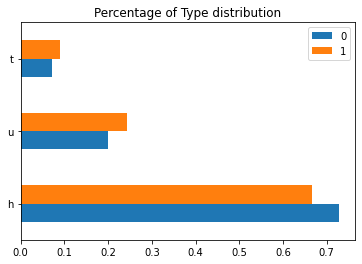

In [11]:
# compare the percentage difference between different groups
t_1 = coun_1.Type.value_counts()
t_0 = coun_0.Type.value_counts()
type_df = pd.DataFrame({0:t_0, 1:t_1})
print(type_df)
(type_df/ type_df.sum()).plot(kind='barh', title='Percentage of Type distribution')

**GROUP 1** - **MORE U and T** types proportions.

**GROUP 0** - **MORE H** type proportion.

<a class="anchor" id="2"></a>
## Distribution of Types in different area

### Group 1 - Council and Region area

In [12]:
# divide into subset df by different Types
t_1_df = coun_1.query("Type == 't'")
u_1_df = coun_1.query("Type == 'u'")
h_1_df = coun_1.query("Type == 'h'")
print(t_1_df.shape)
print(u_1_df.shape)
print(h_1_df.shape)

(700, 22)
(1863, 22)
(5114, 22)


<AxesSubplot:title={'center':'Type percentage by different Council Area(1)'}>

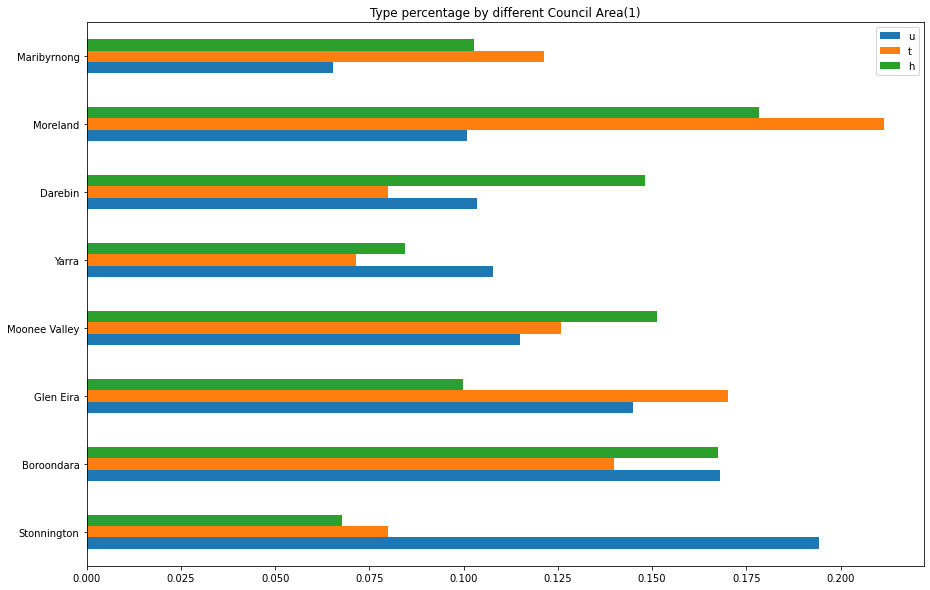

In [13]:
# plot type percentage of different Council Area
u_c_1 = u_1_df.CouncilArea.value_counts()
t_c_1 = t_1_df.CouncilArea.value_counts()
h_c_1 = h_1_df.CouncilArea.value_counts()
type_1 = pd.DataFrame({'u': u_c_1, 't': t_c_1, 'h': h_c_1}).fillna(0).sort_values(by='u', ascending=False)
(type_1 / type_1.sum()).plot(kind='barh', figsize=(15,10), title='Type percentage by different Council Area(1)')

**U** - **YARRA, BOROONDARA and STONNINGTON** has higher frequency. **STONNINGTON** has **DOUBLE** than other types.

**T** - **MARIBYRNONG, MORELAND and GLEN EIRA** has higher frequency. **MORELAND** has **DOUBLE** than U types.

**H** - **DAREBIN and MOONEE VALLEY** has higher frequency. **DAREBIN** has **DOUBLE** than T type.

<AxesSubplot:title={'center':'Type percentage by different Region(1)'}>

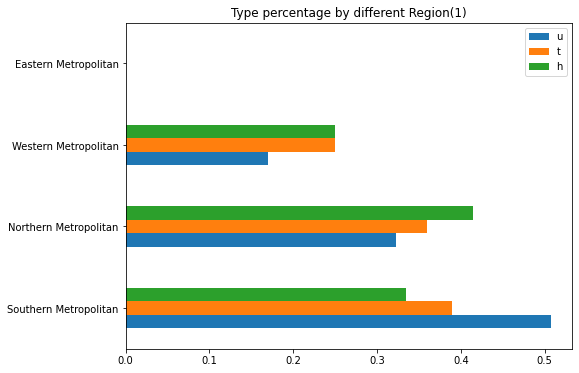

In [14]:
# plot type percentage of different Region
u_r_1 = u_1_df.Regionname.value_counts()
t_r_1 = t_1_df.Regionname.value_counts()
h_r_1 = h_1_df.Regionname.value_counts()
reg_1 = pd.DataFrame({'u': u_r_1, 't': t_r_1, 'h': h_r_1}).fillna(0).sort_values(by='u', ascending=False)
(reg_1 / reg_1.sum()).plot(kind='barh', figsize=(8,6), title='Type percentage by different Region(1)')

**SOUTHERN** has more **U** type, **NORTHERN** has more **H** type. 

### Group 0 - Council and Region area

In [15]:
# divide into subset df by different Types
t_0_df = coun_0.query("Type == 't'")
u_0_df = coun_0.query("Type == 'u'")
h_0_df = coun_0.query("Type == 'h'")
print(t_0_df.shape)
print(u_0_df.shape)
print(h_0_df.shape)

(414, 22)
(1151, 22)
(4212, 22)


<AxesSubplot:title={'center':'Type percentage by different Council Area(0)'}>

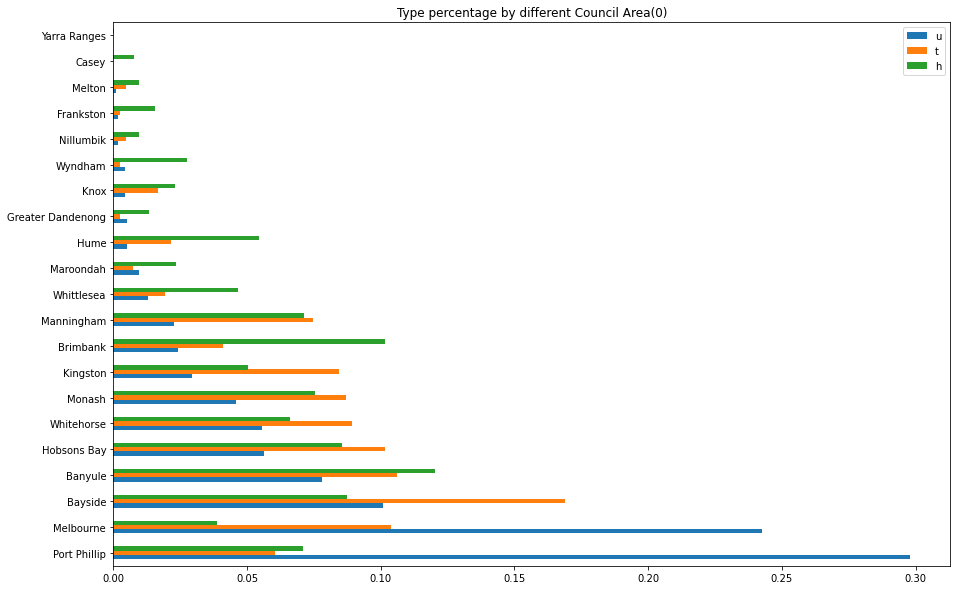

In [16]:
# plot type percentage of different Council Area
u_c_0 = u_0_df.CouncilArea.value_counts()
t_c_0 = t_0_df.CouncilArea.value_counts()
h_c_0 = h_0_df.CouncilArea.value_counts()
type_0 = pd.DataFrame({'u': u_c_0, 't': t_c_0,'h': h_c_0}).fillna(0).sort_values(by='u', ascending=False)
(type_0 / type_0.sum()).plot(kind='barh', figsize=(15,10), title='Type percentage by different Council Area(0)')

**U** - **MELBOURNE and PORT PHILLIP** has more proportion than other Councils. **BOTH** have significant percentage which is **OVER 20%**. Percentage: **PORT PHILLIP > MELBOURNE**

**T** - **BAYSIDE** has significate percentage of **T** type which is nearly **DOUBLE** than **H** type.

**H** - In **LOWER U** types frequency area, **H** has higher even **DOUBLE** percentage than other types.

<AxesSubplot:title={'center':'Type percentage by different Region(0)'}>

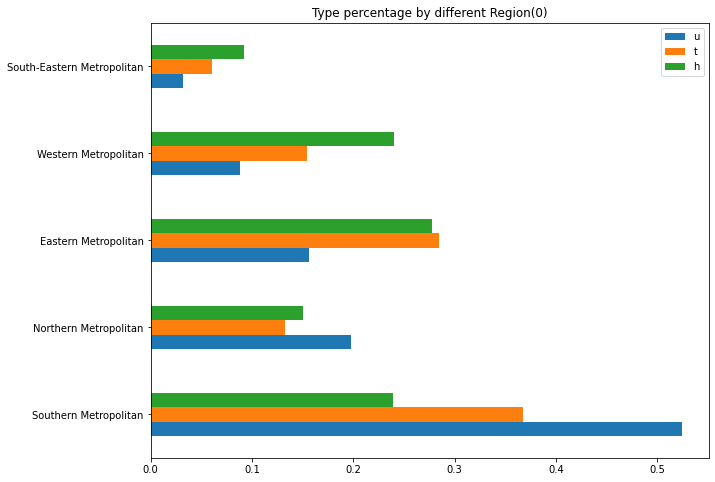

In [16]:
# plot type percentage of different Region
u_r_0 = u_0_df.Regionname.value_counts()
t_r_0 = t_0_df.Regionname.value_counts()
h_r_0 = h_0_df.Regionname.value_counts()
reg_0 = pd.DataFrame({'u': u_r_0, 't': t_r_0, 'h': h_r_0}).fillna(0).sort_values(by='u', ascending=False)
(reg_0 / reg_0.sum()).plot(kind='barh', figsize=(10,8), title='Type percentage by different Region(0)')

**NORTHERN and SOUTHERN** has more **U** types properties.

<a class="anchor" id="3"></a>
## Difference of Type distribution by Region

In [17]:
se = pd.DataFrame({'u':[0],'t':[0],'h':[0]}, index=['South-Eastern Metropolitan'])
reg_1 = reg_1.append(se).astype('int64')

In [18]:
reg_1 = reg_1.rename(columns={'u':'u_1', 't':'t_1', 'h':'h_1'})
reg_0 = reg_0.rename(columns={'u':'u_0', 't':'t_0', 'h':'h_0'})
reg_df = pd.merge(reg_1, reg_0, left_index=True, right_index=True)
reg_df = (reg_df/reg_df.sum())

In [19]:
# difference between different council group by different types
reg_df['u_diff'] = reg_df['u_1'] - reg_df['u_0']
reg_df['t_diff'] = reg_df['t_1'] - reg_df['t_0']
reg_df['h_diff'] = reg_df['h_1'] - reg_df['h_0']
reg_df.style.bar(subset=['u_diff', 't_diff', 'h_diff'], align='mid', color=['red', 'green'])

,u_1,t_1,h_1,u_0,t_0,h_0,u_diff,t_diff,h_diff
Southern Metropolitan,0.507246,0.390000,0.334767,0.524761,0.367150,0.239554,-0.017515,0.022850,0.095214
Northern Metropolitan,0.322598,0.360000,0.414939,0.198089,0.132850,0.150047,0.124509,0.227150,0.264892
Western Metropolitan,0.170156,0.250000,0.250098,0.088619,0.154589,0.240028,0.081537,0.095411,0.010069
Eastern Metropolitan,0.000000,0.000000,0.000196,0.156386,0.285024,0.278253,-0.156386,-0.285024,-0.278057
South-Eastern Metropolitan,0.000000,0.000000,0.000000,0.032146,0.060386,0.092118,-0.032146,-0.060386,-0.092118


**SOUTHERN** - **GROUP 0** has more proportion of **U** than group 1.

**NORTHERN** - **GROUP 1** has significant percentage for **ALL TYPES**. **H TYPE** has highest percentage which is **OVER 26%**.

**EASTER**, **GROUP 0** has significant percentage for **ALL TYPES**. **T TYPE** has highest percentage which is **OVER 28%**.

<a class="anchor" id="4"></a>
## Examine numerical data

In [21]:
coun_1.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Council_level
count,7677.000000,7.677000e+03,7677.000000,7677.000000,7677.000000,7677.000000,7644.000000,7677.000000,4073.000000,4712.000000,7677.000000,7677.000000,7677.000000,7677.0
mean,2.833789,1.115124e+06,7.931835,3087.858669,2.806956,1.492380,1.545526,542.855282,140.706836,1960.174873,-37.797065,144.985090,8228.809822,1.0
std,0.957399,6.709565e+05,3.148172,52.295648,0.974125,0.694729,0.944153,5136.729240,112.990460,38.223649,0.058891,0.065617,4626.623425,0.0
min,1.000000,8.500000e+04,1.600000,3011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-37.937600,144.846200,389.000000,1.0
25%,2.000000,6.700000e+05,5.500000,3044.000000,2.000000,1.000000,1.000000,150.000000,88.000000,1930.000000,-37.836780,144.928800,4918.000000,1.0
50%,3.000000,9.400000e+05,7.800000,3072.000000,3.000000,1.000000,1.000000,344.000000,120.000000,1960.000000,-37.791400,144.996300,7485.000000,1.0
75%,3.000000,1.385000e+06,10.500000,3127.000000,3.000000,2.000000,2.000000,612.000000,167.000000,1998.000000,-37.752300,145.037180,10969.000000,1.0
max,10.000000,8.000000e+06,13.900000,3204.000000,20.000000,8.000000,10.000000,433014.000000,3558.000000,2018.000000,-37.691700,145.105380,21650.000000,1.0


In [22]:
coun_0.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Council_level
count,5777.000000,5.777000e+03,5777.000000,5777.000000,5777.000000,5777.000000,5749.000000,5777.000000,2978.000000,3412.000000,5777.000000,5777.000000,5777.000000,5777.0
mean,3.065259,1.033889e+06,12.566626,3120.729444,3.046218,1.585425,1.688294,536.767699,152.180729,1970.441383,-37.826075,145.009121,6453.066124,0.0
std,0.939330,5.938746e+05,6.547368,103.637865,0.939538,0.684222,0.977604,675.589734,148.349623,35.278327,0.094042,0.128227,3783.041306,0.0
min,1.000000,1.450000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.598640,538.000000,0.0
25%,2.000000,6.350000e+05,8.400000,3047.000000,2.000000,1.000000,1.000000,221.000000,100.000000,1955.000000,-37.880930,144.933000,3582.000000,0.0
50%,3.000000,8.700000e+05,12.600000,3108.000000,3.000000,1.000000,2.000000,544.000000,132.000000,1970.000000,-37.833200,145.015200,5498.000000,0.0
75%,4.000000,1.280000e+06,15.400000,3183.000000,4.000000,2.000000,2.000000,684.000000,180.000000,2000.000000,-37.768880,145.102700,8648.000000,0.0
max,8.000000,9.000000e+06,38.000000,3977.000000,8.000000,6.000000,10.000000,21715.000000,6791.000000,2017.000000,-37.560050,145.330170,17496.000000,0.0


### Remove missing values and examine 2 subsets by boxplot

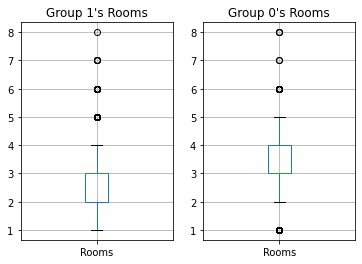

None


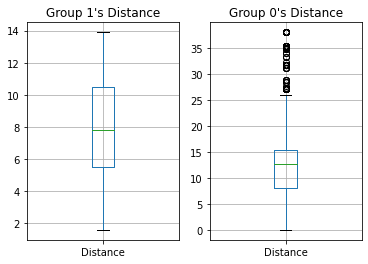

None


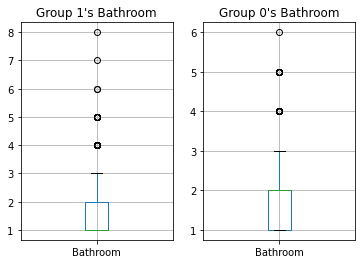

None


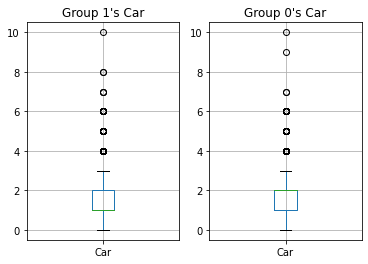

None


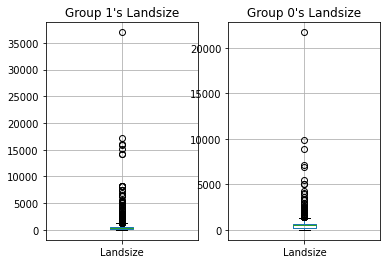

None


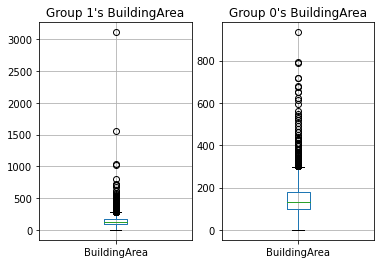

None


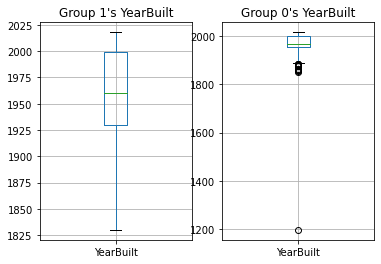

None


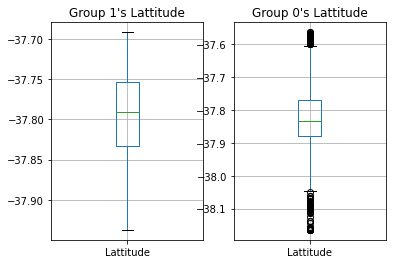

None


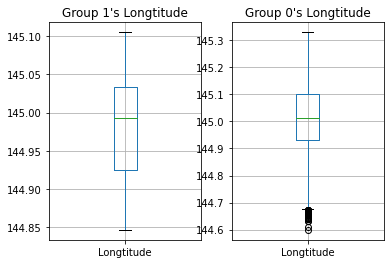

None


In [20]:
# drop row with missing values
# boxplot feature of 2 different subsets
# examine columns which are only include 
# ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
# 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']  

def feat_clean_plot(df1, df0, cols):
    plt.figure()
    plt.subplot(121)
    df1[cols].plot(kind='box', title="Group 1's {}".format(cols), grid=True)
    plt.subplot(122)
    df0[cols].plot(kind='box', title="Group 0's {}".format(cols), grid=True)
    plt.show()

coun_1 = coun_1.dropna()
coun_0 = coun_0.dropna()

features = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']

for col in features:
    print(feat_clean_plot(coun_1, coun_0, col))

### Remove unreliable data from each subset

In [21]:
# remove land size rows which has value over 20000
# remove building area rows which has values is 0
# remove built year rows which year is under 1800

def rm_unreliable_row(df):
    land_index = df.query("Landsize > 20000").index
    build_index = df.query("BuildingArea == 0").index
    build_index_1500 = df.query("BuildingArea > 1500").index
    year_index = df.query("YearBuilt < 1800").index
    index = [land_index, build_index, build_index_1500, year_index]
    
    for i in index:
        df = df.drop(i)
    return df

new_1 = rm_unreliable_row(coun_1)
new_0 = rm_unreliable_row(coun_0)
print(new_1.shape)
print(new_0.shape)

(3903, 22)
(2831, 22)


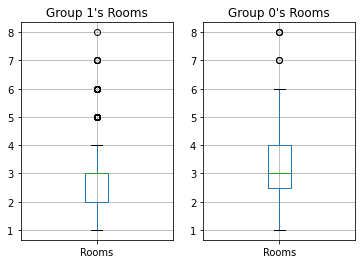

None


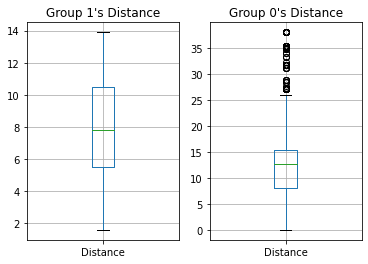

None


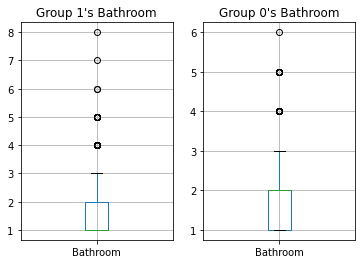

None


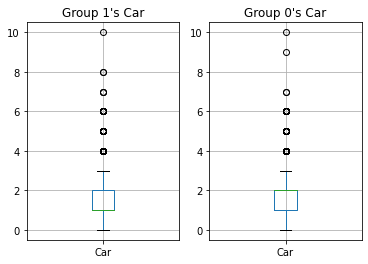

None


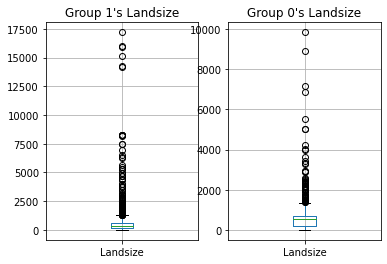

None


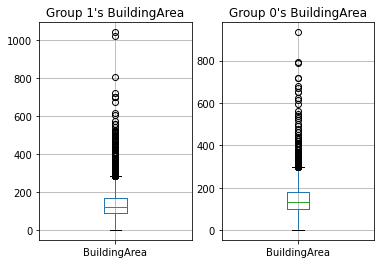

None


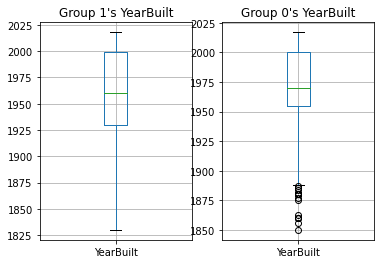

None


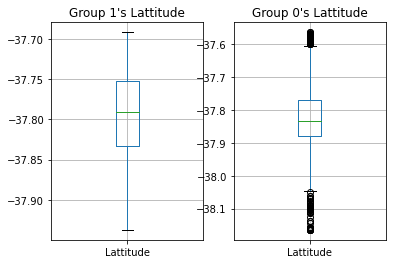

None


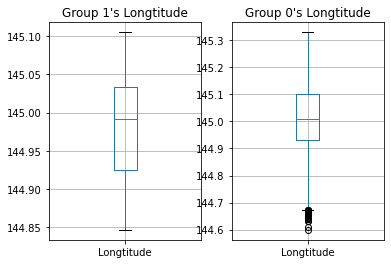

None


In [22]:
# examine again
for col in features:
    print(feat_clean_plot(new_1, new_0, col))

**Rooms** - Both has same **MEDIAN** value, range of values: **0 > 1**.

**Distance** - **1** is **CLOSER** to CBD.

**Bathroom** - **0** has **MORE** bathrooms.

**Car** - Median values: **0 > 1**.

**Building area** - Median value of 1 is slightly smaller than 0.

**Built year** - **1** is older.

**Lattitude and Longtitude** - 1 is narrower than 0.

### Examine numerical data correlation

<AxesSubplot:>

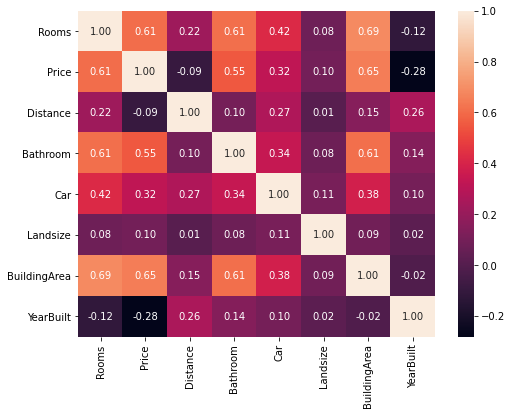

In [26]:
# examine correlation with target
numerical_cols = ['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
plt.figure(figsize=(8,6))
sns.heatmap(new_1[numerical_cols].corr(), annot=True, fmt='.2f')

<AxesSubplot:>

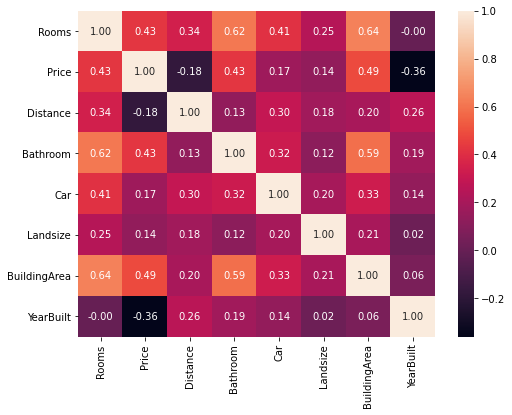

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(new_0[numerical_cols].corr(), annot=True, fmt='.2f')

In those 2 subsets, **ROOMS, BATHROOM, BUILDING AREA** has **STRONGER POSITIVE CORRELATION**, **DISTANCE** has **NEGATIVE** correlation which is reasonable. Most interesting feature is **BUILT YEAR** which is **NEGATIVE** correlaion in this dataset. 

<a class="anchor" id="5"></a>
## Conclude

>**Type distribution** - In entire dataset, **H TYPE** has the most history record.

>**Difference between 2 subsets** - Both **H** has the most records, but **0 has more H than 1**.

>**Difference of Type by different Region** - In **SOUTHERN** region, **0 has more U than 1**.

>**Numerical data** - 
>> **Rooms, Bathroom and car**: **0** has wider range than 1, or median value is bigger than 1.
>
>> **Distance**: **1** is more closer than CBD.
>
>> **Building area**: **1** is slightly smaller.
>
>> **Built year**: **1's** property is older.
>
>> **Lattitude and Longtitude**: the range of **1** is narrower.
>
>> **Correlation**: **Built year** has **NEGATIVE** correlation.